In [5]:
import pandas as pd

PATH = 'C:/Users/skh01/Downloads/따릉이/따릉이/train.csv'
data = pd.read_csv(PATH)

In [6]:
#중복제거 
data.drop_duplicates(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 136.8 KB


In [8]:
data.isna().sum() #모델 성능에 따라 결측치 제거, 결측치 대체를 결정해야 함. 

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [9]:
data.dropna(inplace=True)

In [10]:
data.head() #변수 값의 수치 범위가 다 다르기 때문에 정규화를 해주어야 그 영향을 제거할 수 있다.

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [11]:
#스케일링
from sklearn.preprocessing import MinMaxScaler

In [12]:
mmscaler = MinMaxScaler() #클래스는 인스턴스를 생성해서 사용해주어야 함. 

In [ ]:
# stdata = mmscaler.fit_transform(data)

In [ ]:
# data = data.drop(columns =['ID'])

In [13]:
y = data.pop('count')
X = data

In [14]:
X = mmscaler.fit_transform(X)
X

array([[0.        , 0.86956522, 0.49070632, ..., 0.19672131, 0.25769231,
        0.30487805],
       [0.00137868, 0.56521739, 0.63197026, ..., 0.31967213, 0.24615385,
        0.3902439 ],
       [0.00183824, 0.26086957, 0.40148699, ..., 0.24590164, 0.08846154,
        0.13414634],
       ...,
       [0.99862132, 0.2173913 , 0.56505576, ..., 0.04918033, 0.08076923,
        0.15853659],
       [0.99954044, 0.91304348, 0.65427509, ..., 0.64754098, 0.23846154,
        0.34146341],
       [1.        , 0.73913043, 0.66914498, ..., 0.35245902, 0.11153846,
        0.1097561 ]])

In [15]:
#train test 데이터 분할 
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=20230419) 

# 0.2로 하면 X를 8(train):2(test)로, Y를 8:2로 나누어준다.

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
model = LinearRegression()

In [60]:
model.fit(X_train, y_train)

LinearRegression()

In [61]:
pred = model.predict(X_test)

평가지표 사용

In [62]:
from sklearn.metrics import r2_score

In [63]:
r2_score(y_test, pred)

0.5403446327695727

In [23]:
import matplotlib.pyplot as plt

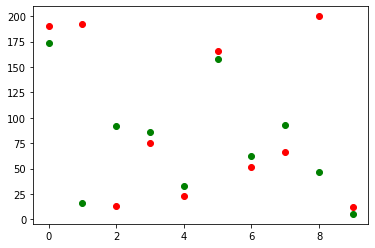

In [64]:
plt.plot(y_test.to_numpy()[:10],'ro')
plt.plot(pred[:10],'go')